In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

Dữ liệu CIFAR-10

In [ ]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

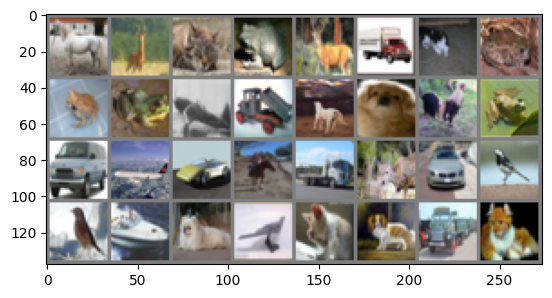

horse deer cat frog


In [ ]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Hiển thị hình ảnh
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))

Triển khai 1 lớp ẩn

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input từ 32x32x3 -> 3072
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

Chuẩn bị mô hình

In [ ]:
input_size = 32 * 32 * 3  # CIFAR-10 có kích thước ảnh 32x32 với 3 kênh màu
hidden_size = 256
output_size = 10  # 10 lớp trong CIFAR-10
learning_rate = 0.001
epochs = 10
batch_size = 32

model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()  # Hàm mất mát
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Huấn luyện mô hình

Epoch 1/10, Loss: 1.6698
Epoch 2/10, Loss: 1.4862
Epoch 3/10, Loss: 1.4026
Epoch 4/10, Loss: 1.3393
Epoch 5/10, Loss: 1.2814
Epoch 6/10, Loss: 1.2376
Epoch 7/10, Loss: 1.1825
Epoch 8/10, Loss: 1.1433
Epoch 9/10, Loss: 1.1053
Epoch 10/10, Loss: 1.0624
Huấn luyện xong


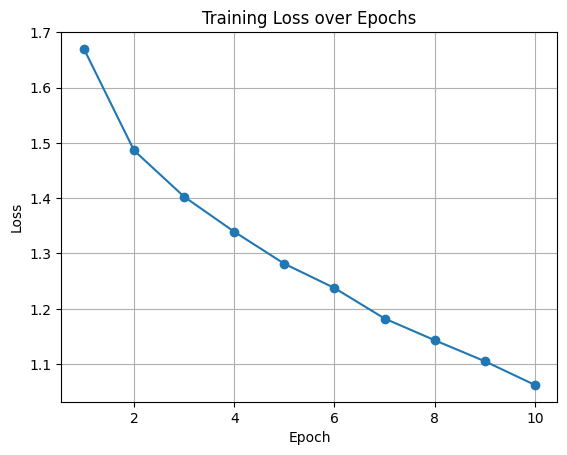

In [ ]:
def train_model(model, trainloader, criterion, optimizer, epochs):
    train_log = []
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs, labels

            # Reset gradient
            optimizer.zero_grad()

            # Forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward và cập nhật trọng số
            loss.backward()
            optimizer.step()

            # Cộng dồn loss
            running_loss += loss.item()

        epoch_loss = running_loss / len(trainloader)
        train_log.append(epoch_loss)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

    print('Huấn luyện xong')
    return train_log

train_log = train_model(model, trainloader, criterion, optimizer, epochs)
plt.plot(range(1, epochs+1), train_log, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid()
plt.show()

Đánh giá mô hình

In [ ]:
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs, labels
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Accuracy: {accuracy * 100:.2f}%')
    return accuracy

test_accuracy = evaluate_model(model, testloader)

Accuracy: 51.98%


In [ ]:
torch.save(model.state_dict(), 'MLPs.pth')

with open('training_log.txt', 'w') as f:
    for epoch, loss in enumerate(train_log, 1):
        f.write(f'Epoch {epoch}, Loss: {loss:.4f}\n')

print("Mô hình đã lưu")

Mô hình đã lưu
